In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_regression/simulated_data/5_is_connected_for_boxplot_noise_6"
fi, metrics = get_results_data(FOLDER, normalize=False, one_hot=False)
fi_norm, _ = get_results_data(FOLDER, normalize=True, one_hot=False)

def translate_value_names(df):
    df['index'] = df['index'].map({str(i): F'X{i}' for i in range(5,10)})
    df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation", 'permutation_train' : 'Permutation Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
    model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'Scikit-Learn Mean Imputing','XGBOOST_MI' : 'XGBoost Mean Imputing'}
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    
translate_value_names(fi), translate_value_names(fi_norm)

(None, None)

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

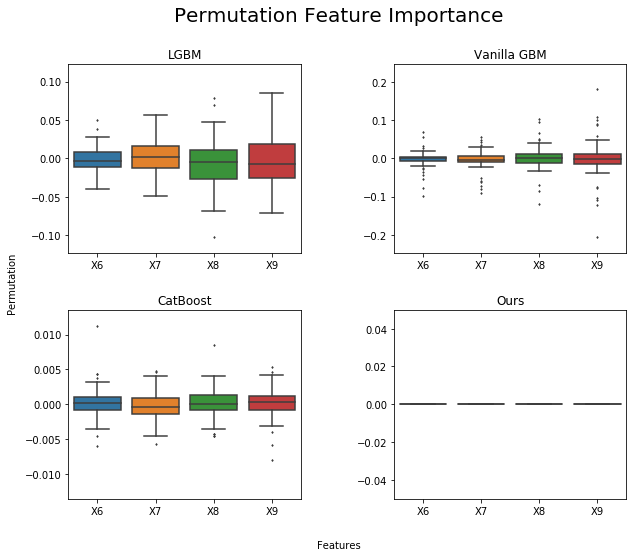

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

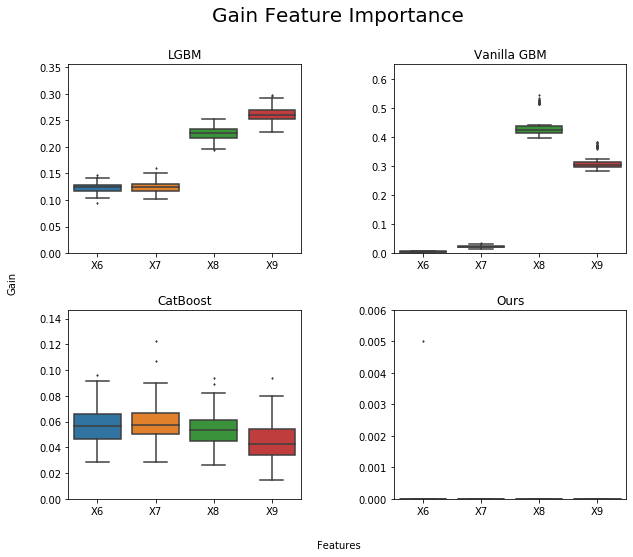

In [3]:
def first_paper_graph(data,title, fi, y_min_zero = False):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'Vanilla GBM', 'CatBoost', 'Ours']
    fig,a =  plt.subplots(2,2,  figsize=(10, 8))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: 0 if y_min_zero else -x
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            plot_data[fi] = plot_data[fi].round(4)
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j], flierprops = dict(markerfacecolor = '0.50', markersize = 1))
            a[i][j].set_xlabel('')
            a[i][j].set_ylabel('')
            counter += 1
    fig.suptitle(title, fontsize=20)
    fig.text(0.5, 0.04, 'Features', ha='center')
    fig.text(0.04, 0.5, f'{fi}', va='center', rotation='vertical')
    fig.savefig(F"{title}.png")
    plt.show()
            
            
            
first_paper_graph(fi[fi['index'] != 'X5'].copy(),'Permutation Feature Importance', 'Permutation') 
first_paper_graph(fi_norm[fi_norm['index'] != 'X5'].copy(), 'Gain Feature Importance' , "Gain",   y_min_zero = True) 

#### Total weight (mean) of uninformative features ('Gain') 

In [4]:
1 - fi_norm[(fi_norm['index'] == 'X5') & (fi_norm['fi_type'] == 'Gain')].groupby('model')['fi_value'].mean()

model
CatBoost                      0.213309
LGBM                          0.733967
Ours                          0.000050
Scikit-Learn Mean Imputing    0.666845
Vanilla GBM                   0.783150
XGBoost Mean Imputing         0.572878
Name: fi_value, dtype: float64

#### Mean weight (mean) of informative features ('Gain' and 'Permutation') 

In [5]:
print('gain')
display(fi_norm[(fi_norm['index'] == 'X5') & (fi_norm['fi_type'] == 'Gain')].groupby('model')['fi_value'].mean())
print('permutation')
display(fi[(fi_norm['index'] == 'X5') & (fi['fi_type'] == 'Permutation')].groupby('model')['fi_value'].mean())

gain


model
CatBoost                      0.786691
LGBM                          0.266033
Ours                          0.999950
Scikit-Learn Mean Imputing    0.333155
Vanilla GBM                   0.216850
XGBoost Mean Imputing         0.427122
Name: fi_value, dtype: float64

permutation


model
CatBoost                      0.323016
LGBM                          0.349808
Ours                          0.321978
Scikit-Learn Mean Imputing    0.340041
Vanilla GBM                   0.367156
XGBoost Mean Imputing         0.338746
Name: fi_value, dtype: float64

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


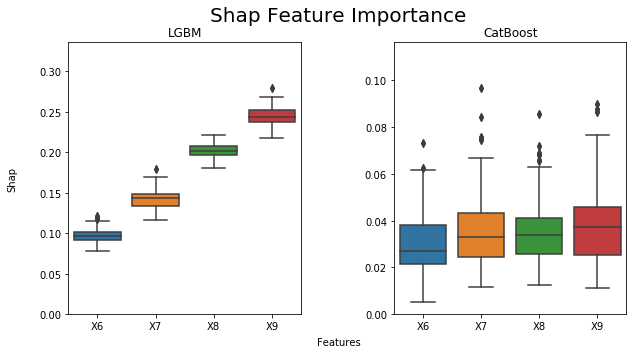

In [6]:
def first_paper_graph_shap(data,title, fi = 'Shap'):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'CatBoost']
    fig,a =  plt.subplots(1,2,  figsize=(10, 5))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: -x if  fi == 'Permutation' else 0
    counter = 0
    for i in range(2):
        temp_model = models[counter]
        plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
        plot_data[fi] = plot_data[fi].round(4)
        ylim = plot_data[fi].apply(np.abs).max()
        a[i].set_title(temp_model)
        a[i].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
#         a[i].yaxis.set_label_coords(-0.2, 0.5)
        sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i])
        a[i].set_xlabel('')
        a[i].set_ylabel('')
        counter += 1
    fig.suptitle(title, fontsize=20)
    fig.text(0.5, 0.04, 'Features', ha='center')
    fig.text(0.04, 0.5, f'{fi}', va='center', rotation='vertical')
    plt.show()
            
            
            
first_paper_graph_shap(fi_norm[fi_norm['index'] != 'X5'],'Shap Feature Importance') 

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

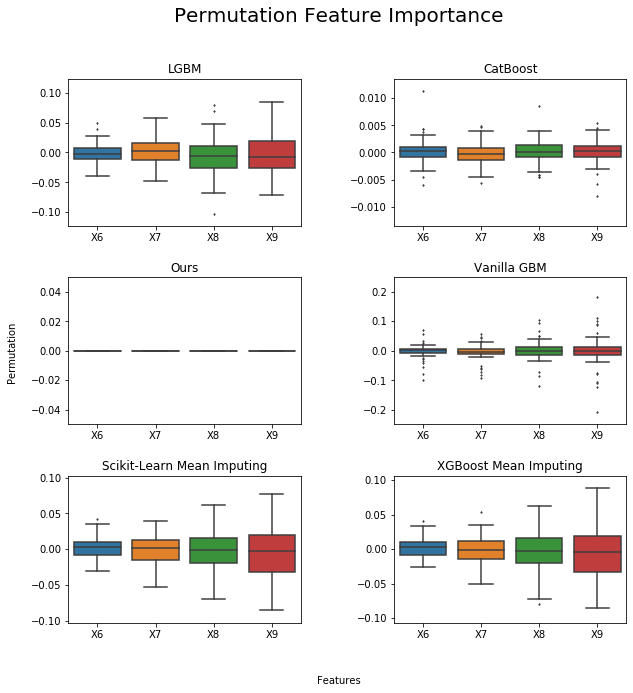

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

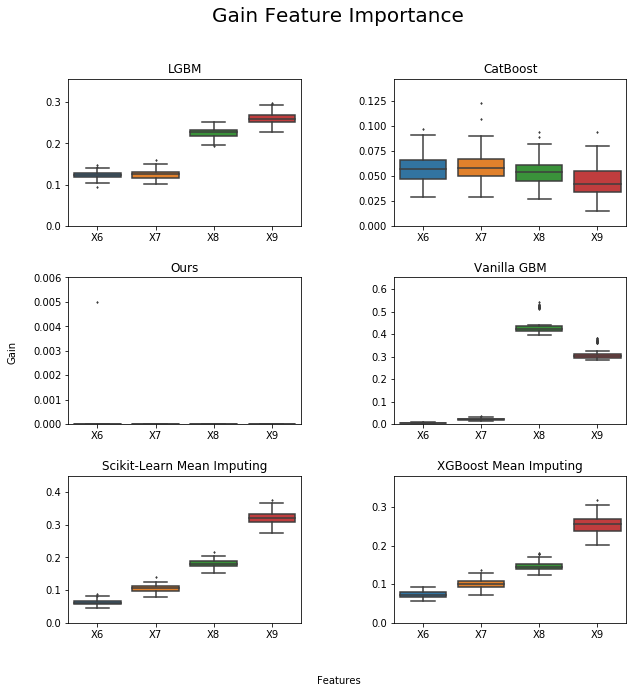

In [7]:
def first_paper_graph_2(data,title, fi):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'CatBoost', 'Ours', 'Vanilla GBM', 'Scikit-Learn Mean Imputing', 'XGBoost Mean Imputing']
    fig,a =  plt.subplots(3,2,  figsize=(10, 10))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.35)
    get_y_min = lambda x: -x if  fi == 'Permutation' else 0
    counter = 0
    for i in range(3):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            plot_data[fi] = plot_data[fi].round(4)
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j], flierprops = dict(markerfacecolor = '0.50', markersize = 1))
            a[i][j].set_xlabel('')
            a[i][j].set_ylabel('')
            counter += 1
    fig.suptitle(title, fontsize=20)
    fig.text(0.5, 0.04, 'Features', ha='center')
    fig.text(0.04, 0.5, f'{fi}', va='center', rotation='vertical')
    fig.savefig(F"{title}_thesis.png")
    plt.show()
            
first_paper_graph_2(fi[fi['index'] != 'X5'],'Permutation Feature Importance', 'Permutation') 
first_paper_graph_2(fi_norm[fi_norm['index'] != 'X5'], 'Gain Feature Importance' , "Gain") 

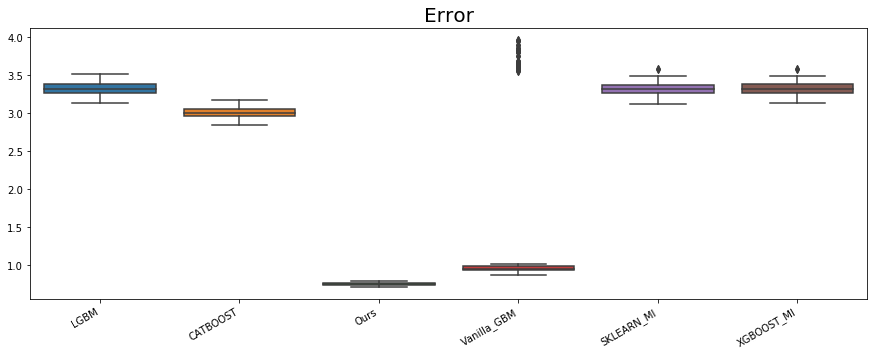

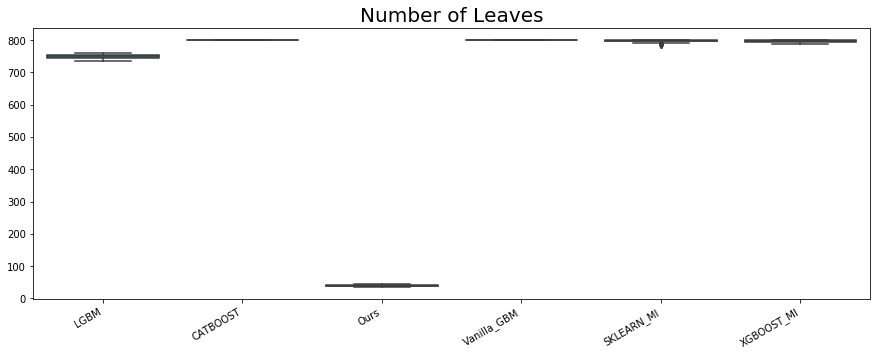

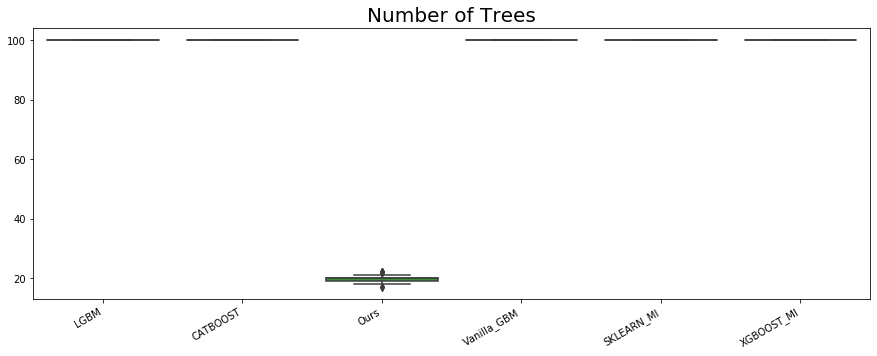

In [8]:
titles_dict = dict(error='Error',ntrees = 'Number of Trees', nleaves = 'Number of Leaves')
for col in metrics.columns[:-1]:
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(x="model", y=col, data=metrics)  
    ax.set_title(titles_dict[col], size=20)  
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()
    ax.get_figure().savefig(f"{titles_dict[col]}.png")

In [9]:
print('mean')
display(metrics.groupby('model').mean())
print('std')
display(metrics.groupby('model').std())


mean


,error,nleaves,ntrees
model,,,
CATBOOST,3.012382,800.00,100.00
LGBM,3.322324,749.67,100.00
Ours,0.754764,39.03,19.77
SKLEARN_MI,3.321476,797.46,100.00
Vanilla_GBM,1.501359,800.00,100.00
XGBOOST_MI,3.325203,796.05,100.00


std


,error,nleaves,ntrees
model,,,
CATBOOST,0.064622,0.000000,0.000000
LGBM,0.077851,5.145237,0.000000
Ours,0.017075,1.971939,0.938886
SKLEARN_MI,0.082139,2.875717,0.000000
Vanilla_GBM,1.120358,0.000000,0.000000
XGBOOST_MI,0.079651,3.615642,0.000000
